# 9. Data Wrangling Introduction

## Three main parts to data wrangling:

![title](img/12.6.png)

## Wrangling part of the text-book proceeds as follows:

### 1. Data import 
(chap10.tibbles and chap11.import), skip
### 2. Data tidy
(chap12.tidy)
### 3. Data transforming 
(chap13.Relational data, chap14.Strings, chap15.Factors, chap16.Dates and times)

# 10. Tibbles

Coding by Python we are more used to pd.DataFrames().

# 11. Data import

As for now pd.read_csv() is good enough for learning data science methods.

Some practical examples.

In [ ]:
# 从指定路径读文件
import os
# os.chdir(r'E:\python3\factors51_63'
path = os.getcwd()
stock = pd.read_csv(os.path.join(path,'数据','公司基本信息文件','TRD_Co1.csv')) 

In [ ]:
# 批量读取同一文件夹中命名无规律文件
files=['airlines','airports','flights','planes','weather']
for file in files:
    f = open('nycflights/%s.csv'%file)
    globals()[file] = pd.read_csv(f)

In [ ]:
# 批量读取同一文件夹中命名有规律文件（如1.csv,2.csv,...20.csv）
for Num in range(20):
    f = open('data/%s.csv'%file)
    globals()[file] = pd.read_csv(f)

In [ ]:
# 论文appendix中批量读取因子数据代码
def datatransfrom(datapath):
    path=datapath
    file = glob.glob(os.path.join(path, "*.csv"))
    k=[]
for i in range(len(file)):
    k.append(pd.read_csv(file[i]))
    ...

# 12 Tidy Data

**“Happy families are all alike; every unhappy family is unhappy in its own way.” –– Leo Tolstoy**

**“Tidy datasets are all alike, but every messy dataset is messy in its own way.” –– Hadley Wickham**

## 12.1 Introduction

In this chapter, you will learn a consistent way to organise your data, an organisation called tidy data. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

In [3]:
from plotnine import * 
import numpy as np
import pandas as pd

In [117]:
files=['table1','table2','table3','table4a','table4b','table5','who']
for file in files:
    f = open('data/%s.csv'%file)
    globals()[file] = pd.read_csv(f)

### Data & Variables：

**'table1', 'table2', 'table3', 'table4a', 'table4b'** below shows the same data organised in 4 different ways. 

Each dataset shows the same values of 4 variables **'country', 'year', 'population', and 'cases'**, but each dataset organises the values in a different way.

## 12.2 What's 'Tidy'

> *Here are three interrelated rules which make a dataset tidy:*
> 
> * Each variable must have its own column.
> * Each observation must have its own row.
> * Each value must have its own cell.

![title](img/12.1.png)
Figure 12.1: Following three rules makes a dataset tidy: variables are in columns, observations are in rows, and values are in cells.

**In tables below, only table1 is tidy. It’s the only representation where each column is a variable.**

In [5]:
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [6]:
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [7]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [9]:
# cases
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [10]:
# population
table4b

,country,1999,2000
0,Afghanistan,19987071,20595360
1,Brazil,172006362,174504898
2,China,1272915272,1280428583


In [207]:
table1['rate'] = table1['cases']/table1['population']*10000
table1

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


In [14]:
# Compute cases per year
y = table1.groupby('year')['cases'].sum()
y

year
1999    250740
2000    296920
Name: cases, dtype: int64

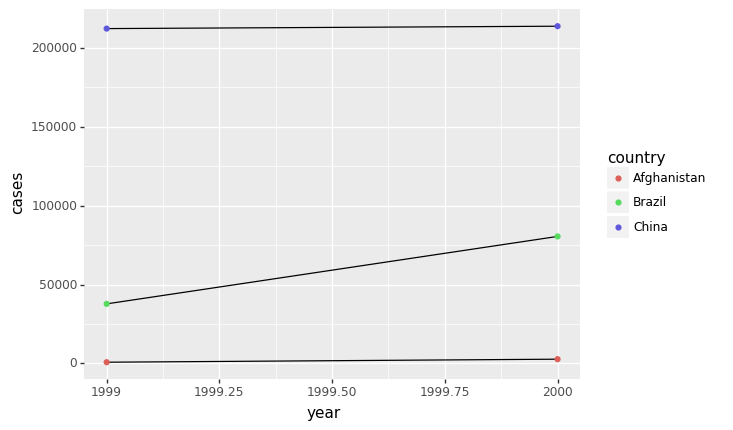

<ggplot: (119127797554)>

In [17]:
# Visualise changes over time
(ggplot(data = table1,mapping = aes(x = 'year', y = 'cases')) +
    geom_line(aes(group = 'country')) + 
    geom_point(aes(colour = "country")))

## 12.3 Pivoting

### Why datasets are untidy

The principles of tidy data seem so obvious that you might wonder if you’ll ever encounter a dataset that isn’t tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:

> * Most people aren’t familiar with the principles of tidy data, and it’s hard to derive them yourself unless you spend a lot of time working with data.
>
>
> * Data is often organised to facilitate some use other than analysis. For example, data is often organised to make entry as easy as possible.

### Steps for tidy
>1. Figure out what the variables and observations are.
>
>
>2. Resolve one of two common problems:
    * One variable might be spread across multiple columns.
    * One observation might be scattered across multiple rows.

### Methods
"To fix these problems, you’ll need the two most important functions in tidyr: pivot_longer() and pivot_wider()". 

In Python we adopt **melt() and pivot()** in pandas.
![title](img/12.2.png)

## 12.3.1 Longer

A common problem is a dataset where some of the column names are not names of variables, but values of a variable.

In [18]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


Take table4a: 

The column names 1999 and 2000 represent values of the year variable, 

The values in the 1999 and 2000 columns represent values of the cases variable, 

And each row represents two observations, not one.

In [34]:
tidy4a = table4a.melt(id_vars='country', var_name='year',value_name='cases')
tidy4a.sort_values(by='country')

,country,year,cases
0,Afghanistan,1999,745
3,Afghanistan,2000,2666
1,Brazil,1999,37737
4,Brazil,2000,80488
2,China,1999,212258
5,China,2000,213766


![title](img/12.3.png)
Figure 12.2: Pivoting table4 into a longer, tidy form.

In [33]:
tidy4b = table4b.melt(id_vars='country', var_name='year',value_name='population')
tidy4b.sort_values(by='country')

,country,year,population
0,Afghanistan,1999,19987071
3,Afghanistan,2000,20595360
1,Brazil,1999,172006362
4,Brazil,2000,174504898
2,China,1999,1272915272
5,China,2000,1280428583


In [37]:
pd.merge(tidy4a,tidy4b).sort_values(by='country')

,country,year,cases,population
0,Afghanistan,1999,745,19987071
3,Afghanistan,2000,2666,20595360
1,Brazil,1999,37737,172006362
4,Brazil,2000,80488,174504898
2,China,1999,212258,1272915272
5,China,2000,213766,1280428583


## 12.3.1 Wider

You use it when an observation is scattered across multiple rows.

In [38]:
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


Take table2:

An observation is a country in a year, 

But each observation is spread across two rows.

In [44]:
tidy2 = table2.pivot(index=['country','year'], columns='type',values='count').reset_index()
tidy2.sort_values(by=['country','year'])

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


![title](img/12.4.png)
Figure 12.3: Pivoting table2 into a “wider”, tidy form.

## 12.4 Separating and uniting

Table3 has a different problem: we have one column (rate) that contains two variables (cases and population). 

### Methods
Convert values to strings and operated with apply() and lambda() functions.

### 12.4.1 Separate

In [210]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [72]:
# 方法一：Series转化为字符串后使用split()
# table3['cases'],table3['population'] = table3['rate'].str.split('/',1).str
# 方法二：对Series内元素使用map()
tidy3 = table3.copy()
tidy3['cases']= tidy3['rate'].map(lambda x:x.split('/')[0])
tidy3['population']= tidy3['rate'].map(lambda x:x.split('/')[1])
tidy3

,country,year,rate,cases,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272
5,China,2000,213766/1280428583,213766,1280428583


In [77]:
table3_century = table3.copy()
table3_century.rename(columns={'year': 'row_year'}, inplace=True)
table3_century['century']=table3_century['row_year'].apply(lambda x:str(x)[:2])
table3_century['year']=table3_century['row_year'].apply(lambda x:str(x)[2:])
table3_century

,country,row_year,rate,century,year
0,Afghanistan,1999,745/19987071,19,99
1,Afghanistan,2000,2666/20595360,20,00
2,Brazil,1999,37737/172006362,19,99
3,Brazil,2000,80488/174504898,20,00
4,China,1999,212258/1272915272,19,99
5,China,2000,213766/1280428583,20,00


### 12.4.2 Unite

In [212]:
tidy5 = table5.copy()
tidy5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,0,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,0,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,0,213766/1280428583


In [213]:
tidy5['year'] = tidy5['year'].apply(lambda x:str(x)).replace('0','00')
tidy5['century'] = tidy5['century'].apply(lambda x:str(x))
tidy5['new'] = tidy5['century']+'_'+tidy5['year']
tidy5

,country,century,year,rate,new
0,Afghanistan,19,99,745/19987071,19_99
1,Afghanistan,20,00,2666/20595360,20_00
2,Brazil,19,99,37737/172006362,19_99
3,Brazil,20,00,80488/174504898,20_00
4,China,19,99,212258/1272915272,19_99
5,China,20,00,213766/1280428583,20_00


## 12.5 Missing values

Explicit & implicit missing value

In [134]:
stocks =pd.DataFrame({  'year':[2015, 2015, 2015, 2015, 2016, 2016, 2016],
  'qtr':[   1,    2,    3,    4,    2,    3,    4],
  'return':[1.88, 0.59, 0.35, np.nan, 0.92, 0.17, 2.66]})
stocks

,year,qtr,return
0,2015,1,1.88
1,2015,2,0.59
2,2015,3,0.35
3,2015,4,NaN
4,2016,2,0.92
5,2016,3,0.17
6,2016,4,2.66


In [149]:
wide_stock = stocks.pivot(index='qtr',columns='year',values='return').reset_index()
wide_stock

year,qtr,2015,2016
0,1,1.88,NaN
1,2,0.59,0.92
2,3,0.35,0.17
3,4,NaN,2.66


In [150]:
long_wide_stock = wide_stock.melt(id_vars='qtr', var_name='year',value_name='return')
long_wide_stock

,qtr,year,return
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,NaN
4,1,2016,NaN
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


Pandas preserves rows 3,4, making missing values explicit. 

R's tidyr, if set pivot_longer(values_drop_na = TRUE), then rows 3,4 are dropped, called implicit missing values.

印象中收集并计算异象因子时，若一只股票在所有时间段的收益数据缺失，在数据透视转换后查验该股票代码编号变量被自动删去，可理解是pivot方法的隐性缺失值处理。

### Fill Principle for nan

In [152]:
treatment =pd.DataFrame({  'person':['Derrick Whitmore',np.nan,np.nan,'Katherine Burke'],
  'treatment':[   1,    2,    3,    1],
  'response':[    7,    10,   9,    4]})
treatment.fillna(method='ffill')  # 向下填充

,person,treatment,response
0,Derrick Whitmore,1,7
1,Derrick Whitmore,2,10
2,Derrick Whitmore,3,9
3,Katherine Burke,1,4


## 12.6 Case study 

who dataset contains tuberculosis (TB) cases broken down by **year, country, age, gender, and diagnosis method**. The data comes from the 2014 World Health Organization Global Tuberculosis Report.

In [153]:
who

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zimbabwe,ZW,ZWE,2009,125.0,578.0,NaN,3471.0,681.0,293.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,ZW,ZWE,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,ZW,ZWE,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
who1 = who.melt(id_vars=['country','iso2','iso3','year'], var_name='key',value_name='cases')
who1[who1.cases.notnull()]

,country,iso2,iso3,year,key,cases
17,Afghanistan,AF,AFG,1997,new_sp_m014,0.0
18,Afghanistan,AF,AFG,1998,new_sp_m014,30.0
19,Afghanistan,AF,AFG,1999,new_sp_m014,8.0
20,Afghanistan,AF,AFG,2000,new_sp_m014,52.0
21,Afghanistan,AF,AFG,2001,new_sp_m014,129.0
...,...,...,...,...,...,...
405269,Viet Nam,VN,VNM,2013,newrel_f65,3110.0
405303,Wallis and Futuna Islands,WF,WLF,2013,newrel_f65,2.0
405371,Yemen,YE,YEM,2013,newrel_f65,360.0
405405,Zambia,ZM,ZMB,2013,newrel_f65,669.0


In [170]:
who1.groupby('key')['cases'].count()

key
new_ep_f014     1032
new_ep_f1524    1021
new_ep_f2534    1021
new_ep_f3544    1021
new_ep_f4554    1017
new_ep_f5564    1017
new_ep_f65      1014
new_ep_m014     1038
new_ep_m1524    1026
new_ep_m2534    1020
new_ep_m3544    1024
new_ep_m4554    1020
new_ep_m5564    1015
new_ep_m65      1018
new_sn_f014     1040
new_sn_f1524    1022
new_sn_f2534    1016
new_sn_f3544    1020
new_sn_f4554    1018
new_sn_f5564    1017
new_sn_f65      1019
new_sn_m014     1045
new_sn_m1524    1030
new_sn_m2534    1022
new_sn_m3544    1025
new_sn_m4554    1027
new_sn_m5564    1021
new_sn_m65      1020
new_sp_f014     3174
new_sp_f1524    3194
new_sp_f2534    3200
new_sp_f3544    3199
new_sp_f4554    3204
new_sp_f5564    3195
new_sp_f65      3197
new_sp_m014     3173
new_sp_m1524    3209
new_sp_m2534    3206
new_sp_m3544    3219
new_sp_m4554    3223
new_sp_m5564    3218
new_sp_m65      3209
newrel_f014      190
newrel_f1524     184
newrel_f2534     182
newrel_f3544     183
newrel_f4554     183
newrel_f5

In [191]:
who2 = who1.copy()
who2['key'] = who2['key'].apply(lambda x:x.replace('newrel','new_rel'))
who2[who2.cases.notnull()]

,country,iso2,iso3,year,key,cases
17,Afghanistan,AF,AFG,1997,new_sp_m014,0.0
18,Afghanistan,AF,AFG,1998,new_sp_m014,30.0
19,Afghanistan,AF,AFG,1999,new_sp_m014,8.0
20,Afghanistan,AF,AFG,2000,new_sp_m014,52.0
21,Afghanistan,AF,AFG,2001,new_sp_m014,129.0
...,...,...,...,...,...,...
405269,Viet Nam,VN,VNM,2013,new_rel_f65,3110.0
405303,Wallis and Futuna Islands,WF,WLF,2013,new_rel_f65,2.0
405371,Yemen,YE,YEM,2013,new_rel_f65,360.0
405405,Zambia,ZM,ZMB,2013,new_rel_f65,669.0


In [195]:
who3 = who2.copy()
who3['new']= who3['key'].map(lambda x:x.split('_')[0])
who3['type']= who3['key'].map(lambda x:x.split('_')[1])
who3['sexage']=who3['key'].map(lambda x:x.split('_')[2])
who3[who3.cases.notnull()]

,country,iso2,iso3,year,key,cases,new,type,sexage
17,Afghanistan,AF,AFG,1997,new_sp_m014,0.0,new,sp,m014
18,Afghanistan,AF,AFG,1998,new_sp_m014,30.0,new,sp,m014
19,Afghanistan,AF,AFG,1999,new_sp_m014,8.0,new,sp,m014
20,Afghanistan,AF,AFG,2000,new_sp_m014,52.0,new,sp,m014
21,Afghanistan,AF,AFG,2001,new_sp_m014,129.0,new,sp,m014
...,...,...,...,...,...,...,...,...,...
405269,Viet Nam,VN,VNM,2013,new_rel_f65,3110.0,new,rel,f65
405303,Wallis and Futuna Islands,WF,WLF,2013,new_rel_f65,2.0,new,rel,f65
405371,Yemen,YE,YEM,2013,new_rel_f65,360.0,new,rel,f65
405405,Zambia,ZM,ZMB,2013,new_rel_f65,669.0,new,rel,f65


In [204]:
who4 = who3.drop(['new','iso2','iso3'], axis=1)
who5 = who4.copy()
who5['sex'] = who4['sexage'].apply(lambda x:x[:1])
who5['age'] = who4['sexage'].apply(lambda x:x[1:])
who5

,country,year,key,cases,type,sexage,sex,age
0,Afghanistan,1980,new_sp_m014,NaN,sp,m014,m,014
1,Afghanistan,1981,new_sp_m014,NaN,sp,m014,m,014
2,Afghanistan,1982,new_sp_m014,NaN,sp,m014,m,014
3,Afghanistan,1983,new_sp_m014,NaN,sp,m014,m,014
4,Afghanistan,1984,new_sp_m014,NaN,sp,m014,m,014
...,...,...,...,...,...,...,...,...
405435,Zimbabwe,2009,new_rel_f65,NaN,rel,f65,f,65
405436,Zimbabwe,2010,new_rel_f65,NaN,rel,f65,f,65
405437,Zimbabwe,2011,new_rel_f65,NaN,rel,f65,f,65
405438,Zimbabwe,2012,new_rel_f65,NaN,rel,f65,f,65


### Pipe method in R makes process brief and clear

![title](img/12.5.png)

If there's sth similar in pandas.